<h1 style="text-align: center;"> Striver Linked Lists Part II - Singly Linked Lists </h1>

# 1. Check if a Linked List is a Palindrome or not :

## Problem Statement :

Given the head of a singly linked list representing a positive integer number. Each node of the Linked List represents a digit of the number, with the 1st node containing the leftmost digit of the number and so on. Check whether the linked list values form a palindrome or not. Return true if it forms a palindrome, otherwise, return false.

<b> A palindrome is a sequence that reads the same forward and backwards.</b>


### Examples :

**Example 1:**
```
Input: head -> 3 -> 7 -> 5 -> 7 -> 3
Output: true

Explanation: 37573 is a palindrome.
```

**Example 2:**
```
Input: head -> 1 -> 1 -> 2 -> 1
Output: false

Explanation: 1121 is not a palindrome.
```

```
Constraints:
1 <= number of nodes in the Linked List <= 10^5
0 <= ListNode.val <= 9
The number represented does not contain any leading zeroes.
```

# Brute Force Solution

### Intuition

A simple way to determine if a given Linked List is a palindrome is to use an additional data structure to temporarily store the node values. We can utilize a Stack for this purpose. As we traverse the Linked List, we push each node's value onto the stack, which stores the values in reverse order. After traversing the entire list, we traverse it again and compare each node's value with the values popped from the top of the Stack. If all values match, the Linked List is a Palindrome.

### Approach

* <b> Initialize: </b> Begin by creating an empty stack. This stack will help us temporarily store the nodes' values as we traverse the Linked List.
* <b> Traverse and Store: </b> Traverse the linked list using a temporary pointer `temp`. As we move through each node, push its value onto the stack. This action stacks the values in reverse order—starting from the head to the tail of the linked list.

<b> Comparison: </b> Reset the `temp` pointer back to the head of the Linked List after storing all values. While the stack is not empty :

* Pop the top value from the stack.
* Compare this value with the value at the current `temp` node.
* If they match, move `temp` to the next node and continue the comparison.
* If any value does not match during this traversal, conclude that the Linked List is not a Palindrome and return false.
* Palindrome Check: If all values match until the `temp` pointer reaches the end of the Linked List, conclude that the Linked List is a palindrome and return true.

<b> Palindrome Check: </b> If all the values match until the `temp` pointer reaches the end of the Linked List, conclude that the Linked List is a palindrome and return true.

This approach uses a stack to reverse the order of values temporarily, allowing efficient comparison to check if theLlinkedLlist maintains symmetry both forwards and backwards.

## Dry Run

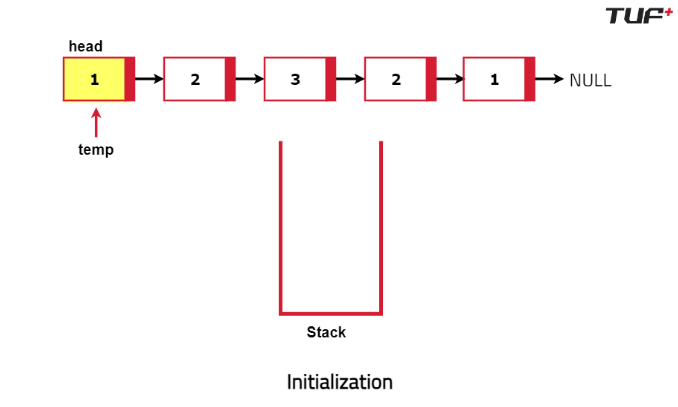
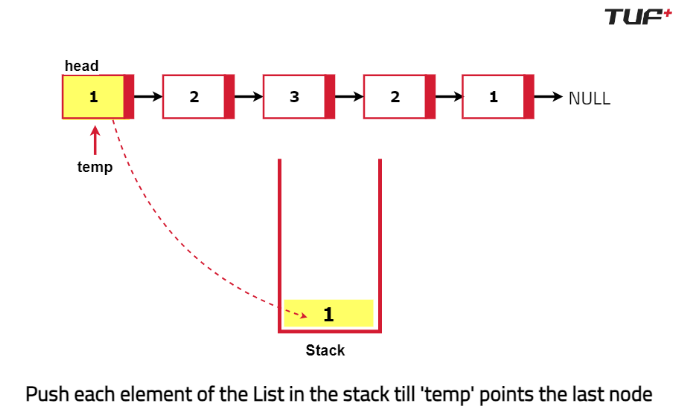
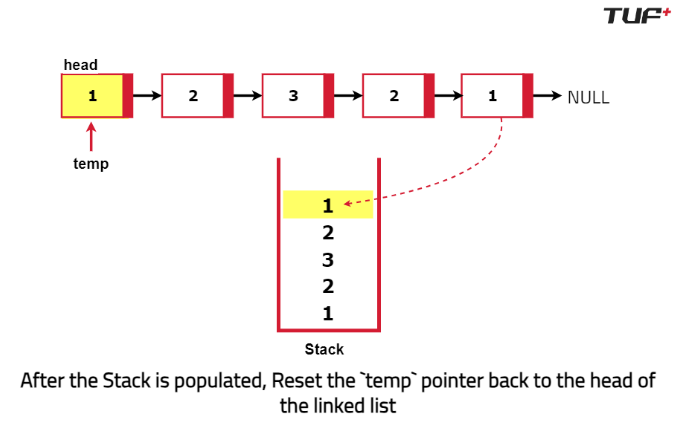
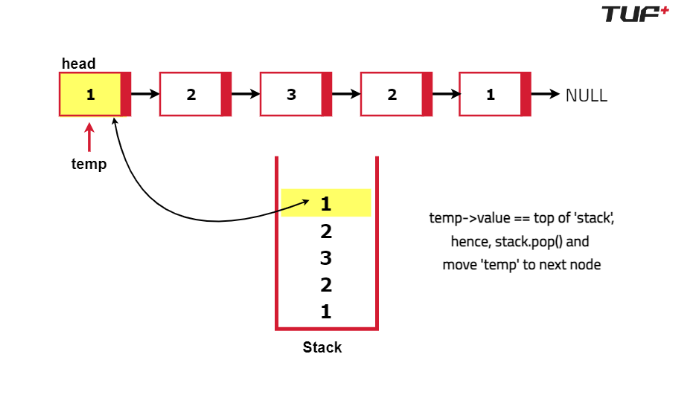
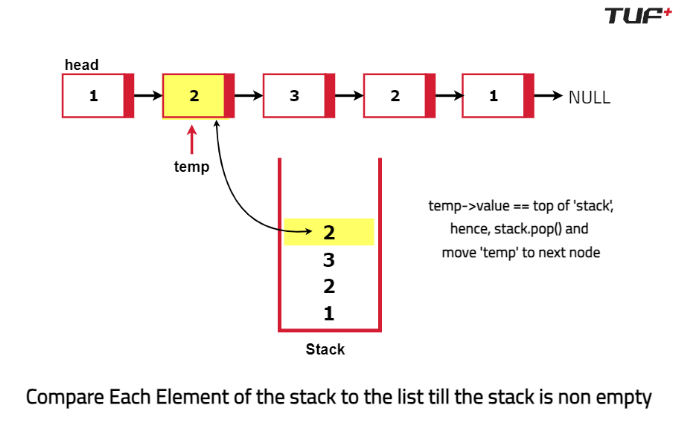
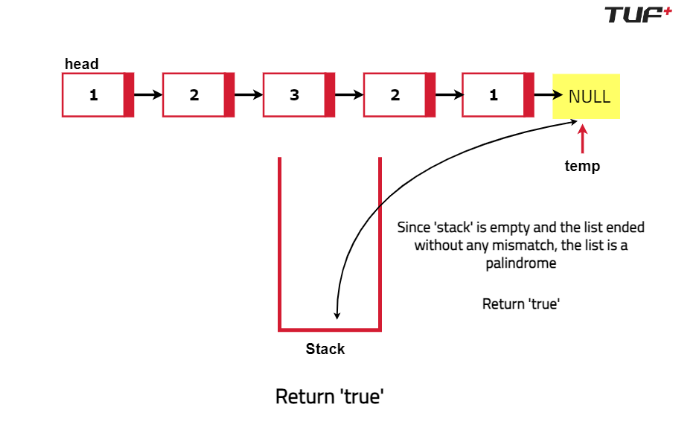

## Brute Force Python Solution

In [1]:
# Definition of singly linked list:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    def isPalindrome(self, head):
        # Create an empty stack
        stack = []
        
        # Initialize temporary pointer
        temp = head
        
        # Traverse the linked list
        while temp is not None:
            # Push the data from 
            # the current node onto the stack
            stack.append(temp.val)
            
            # Move to the next node
            temp = temp.next
        
        # Reset temporary pointer 
        # back to the head of the 
        # linked list
        temp = head
        
        # Compare values by popping from the 
        # stack and checking against linked list nodes
        while temp is not None:
            if temp.val != stack.pop():
                # If values don't match, 
                # it's not a palindrome
                return False
            
            # Move to the next node 
            # in the linked list
            temp = temp.next
        
        # If all values match,
        # it's a palindrome
        return True

In [2]:
# Function to print the linked list
def print_linked_list(head):
    temp = head
    while temp is not None:
        print(temp.val, end=" ")
        temp = temp.next
    print()

if __name__ == "__main__":
    # Create a linked list with values 1, 5, 2, 5, and 1 (15251, a palindrome)
    head = ListNode(1)
    head.next = ListNode(5)
    head.next.next = ListNode(2)
    head.next.next.next = ListNode(5)
    head.next.next.next.next = ListNode(1)
    
    # Print the original linked list
    print("Original Linked List: ", end="")
    print_linked_list(head)
    
    # Check if the linked list is a palindrome
    solution = Solution()
    if solution.isPalindrome(head):
        print("The linked list is a palindrome.")
    else:
        print("The linked list is not a palindrome.")

Original Linked List: 1 5 2 5 1 
The linked list is a palindrome.


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2*N) because we need to traverse the linked list twice: once to push the values onto the stack and once more to pop the values and compare them with the nodes in the linked list. Here, N represents the number of nodes in the linked list. Even though it's O(2*N), it effectively simplifies to O(N).
```

**Space Complexity:**
```
The Space Complexity will be O(N) since we are using a stack to store the values of the Linked List. In the worst-case scenario, the stack will hold all N values from the Linked List, essentially storing the entire list.
```

# Optimal Solution

### Intuition

The previous approach uses O(N) additional space, which can be avoided by reversing only half of the linked list and comparing the first and second halves. If they match, reverse the portion that was originally reversed, and then return true; otherwise, return false. To implement this, we need to reverse the second half and compare it with the first half in phases. The first step is to divide the linked list into two halves by finding the middle node using the Tortoise and Hare Algorithm.

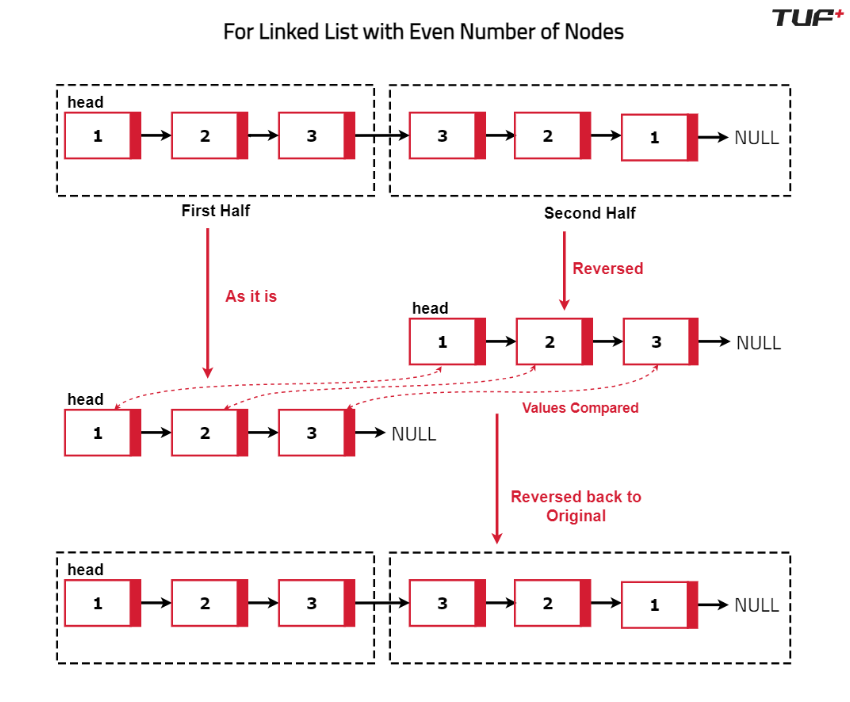

### Approach

Find the middle of the linked list using the Tortoise and Hare Algorithm, then reverse the second half of the list and compare it with the first half. If all values match, the list is a palindrome; otherwise, it is not. This approach ensures that the list is correctly checked without using additional space beyond the stack space used during recursion.

**Detailed Steps to Check Palindrome in a Linked List**

<b>Check Base Case:</b> If the Linked List is empty or has only one node, it is a palindrome by definition. Return true.

<b>Find the Middle:</b> Initialize 2 pointers, ‘slow’ and ‘fast’. Use the Tortoise and Hare Algorithm where ‘slow’ moves 1 step at a time and ‘fast’ moves 2 steps at a time. Continue until ‘fast’ reaches the end or the second last node. The ‘slow’ pointer will be at the middle.

<b>Reverse Second Half:</b> Reverse the second half of the Linked List starting from the node after the middle (‘slow->next’). Use a function to reverse the linked list and return the head of the reversed list.

<b>Initialize Pointers for Comparison:</b> Create two pointers, ‘first’ pointing to the head of the linked list and ‘second’ pointing to the head of the reversed second half.

<b>Compare Halves:</b> Compare the data values of nodes from both halves. If any values do not match, return false. Move both ‘first’ and ‘second’ pointers through their respective halves, comparing values until one of them reaches the end.

<b>Restore Original List:</b> After comparison, reverse the second half back to its original state and reattach it to the first half. If all values matched, return true. If not, return false.

## Dry Run

**For Linked List with Even Number of Nodes**

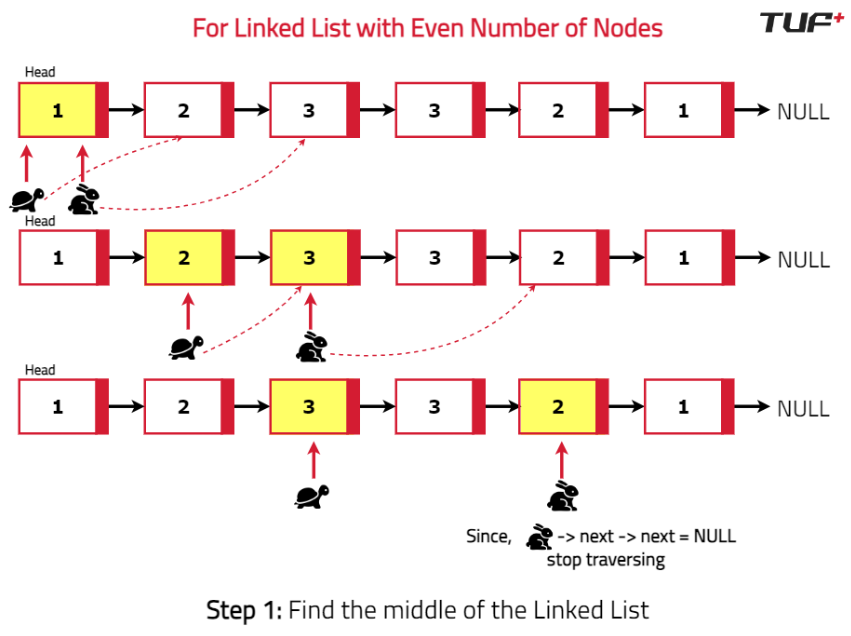
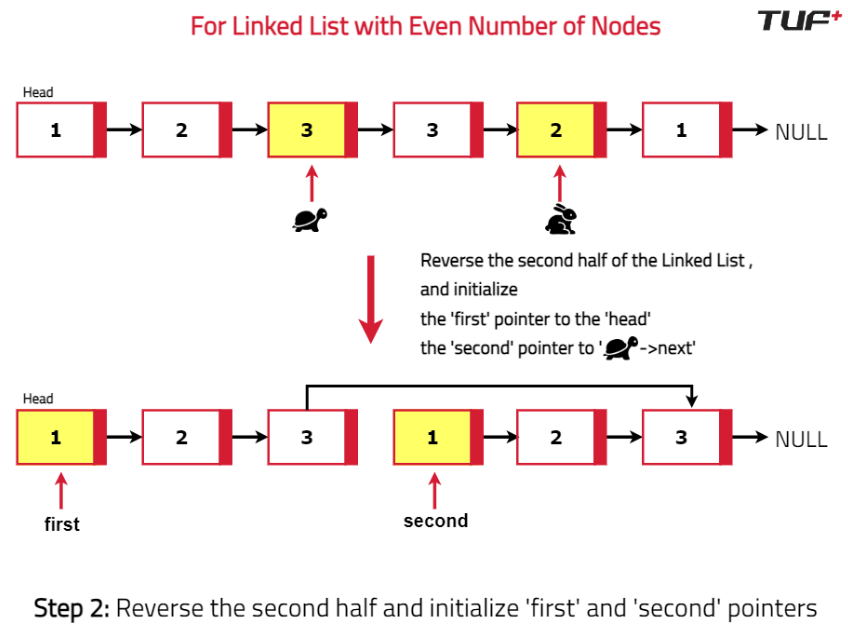
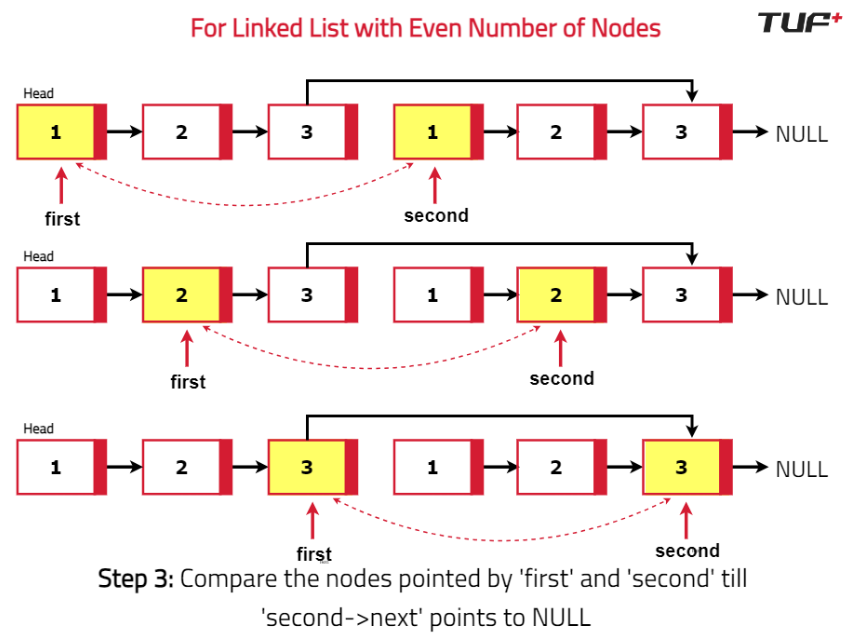

**For Linked List with Odd Number of Nodes**

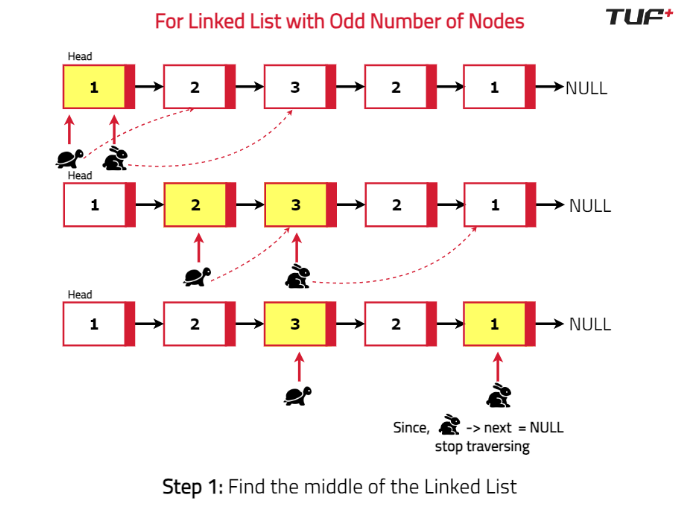
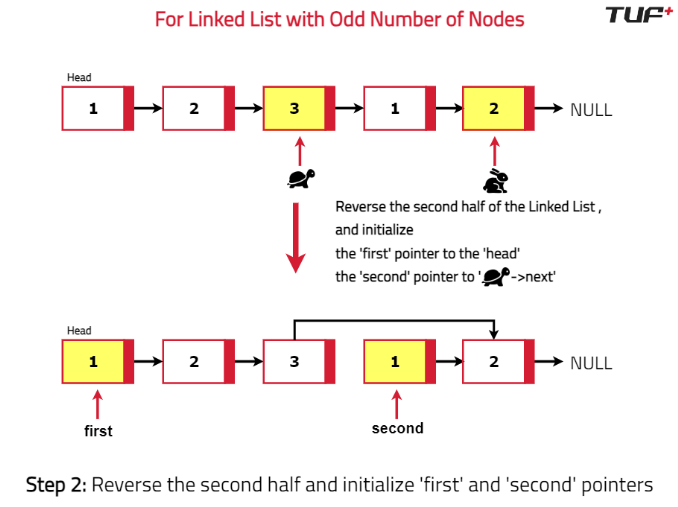
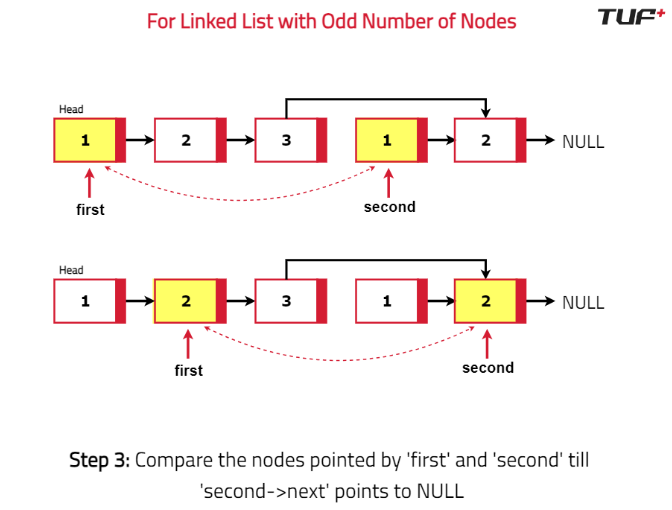

## Optimal Python Solution

In [3]:
# Definition of singly linked list:
class ListNode:
    def __init__(self, data1=0, next1=None):
        self.val = data1
        self.next = next1

class Solution:
    
    # Function to reverse a linked list
    # using the iterative approach
    def reverseLinkedList(self, head):
        # Initialize previous pointer as None
        prev = None
        
        # Initialize current pointer as head
        curr = head
        
        # Traverse the list until all nodes are processed
        while curr is not None:
            # Temporarily store the next node
            next_node = curr.next
            
            # Reverse the link direction
            curr.next = prev
            
            # Move 'prev' one step forward
            prev = curr
            
            # Move 'curr' one step forward
            curr = next_node
        
        # 'prev' now points to the new head after reversal
        return prev

    def isPalindrome(self, head):
        # Check if the linked list is empty
        # or has only one node
        if head is None or head.next is None:
            # It's a palindrome by definition
            return True
        
        # Initialize two pointers, slow and fast,
        # to find the middle of the linked list
        slow = head
        fast = head
        
        # Traverse the linked list to find the
        # middle using the slow-fast pointer approach
        while fast.next is not None and fast.next.next is not None:
            # Move slow pointer one step
            slow = slow.next
            
            # Move fast pointer two steps
            fast = fast.next.next
        
        # Reverse the second half of the linked list
        # starting from the node after the middle
        newHead = self.reverseLinkedList(slow.next)
        
        # Pointer to the first half
        first = head
        
        # Pointer to the reversed second half
        second = newHead
        
        # Compare nodes from both halves
        # one by one to check for palindrome
        while second is not None:
            # If mismatch found, it's not a palindrome
            if first.val != second.val:
                # Restore the original list before returning
                self.reverseLinkedList(newHead)
                return False
            
            # Move both pointers one step ahead
            first = first.next
            second = second.next
        
        # Restore the second half of the linked list
        # to its original order
        self.reverseLinkedList(newHead)
        
        # All values matched, the list is a palindrome
        return True

In [4]:
# Function to print the linked list
def printLinkedList(head):
    temp = head
    while temp is not None:
        print(temp.val, end=" ")
        temp = temp.next
    print()

if __name__ == "__main__":
    # Create a linked list with values 1, 5, 2, 5, and 1 (15251, a palindrome)
    head = ListNode(1)
    head.next = ListNode(5)
    head.next.next = ListNode(2)
    head.next.next.next = ListNode(5)
    head.next.next.next.next = ListNode(1)
    
    # Print the original linked list
    print("Original Linked List: ", end="")
    printLinkedList(head)
    
    # Check if the linked list is a palindrome
    solution = Solution()
    if solution.isPalindrome(head):
        print("The linked list is a palindrome.")
    else:
        print("The linked list is not a palindrome.")

Original Linked List: 1 5 2 5 1 
The linked list is a palindrome.


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2*N). The algorithm involves traversing the Linked List twice. The first traversal finds the middle and reverses the second half, while the second traversal compares elements from both halves. Since each traversal covers N/2 elements, the total time complexity is O(N/2 + N/2 + N/2 + N/2), which simplifies to O(2*N), ultimately reducing to O(N).
```

**Space Complexity:**
```
The Space Complexity will be O(1). This approach uses a constant amount of additional space, regardless of the Linked List's size. It does not require any extra data structures that depend on the input size, resulting in a Space Complexity of O(1).
```

## FAQs & Interview Follow-ups :

**Why do we reverse only the second half instead of the full list?**
```
We only need to check the latter half against the first half. This keeps the process in-place (O(1) space).
```

**Why do we restore the list after checking?**
```
In interview settings, modifying input structure might be disallowed. If restoration isn’t required, skip this step.
```

**What if the list was circular?**
```
Find the midpoint using slow-fast pointers, then break the cycle temporarily.
```

**Can this be solved recursively?**
```
Yes, but recursion uses O(N) stack space, making it less efficient.
```

# 2. Segregate Odd and Even Nodes in Linked List :

## Problem Statement :

Given the head of a Singly Linked List. Group all the nodes with odd indices followed by all the nodes with even indices and return the reordered list.

<b>Consider the 1st node to have index 1 and so on. The relative order of the elements inside the odd and even group must remain the same as the given input.</b>


### Examples :

**Example 1:**
```
Input: linkedList = [1, 2, 3, 4, 5]
Output: [1, 3, 5, 2, 4]

Explanation:
The nodes with odd indices are 1, 3, 5 and the ones with even indices are 2, 4.
```

**Example 2:**
```
Input: linkedList = [4, 3, 2, 1]
Output: [4, 2, 3, 1]

Explanation:
The nodes with odd indices are 4, 2 and the ones with even indices are 3, 1.
```

```
Constraints:
0 <= Number of Nodes in the Linked List <= 10^5
0 <= ListNode.val <= 10^4
```

# Brute Force Solution

### Intuition

The simplest way to approach this problem is to traverse the Linked List, gather the elements at odd and even indices into separate lists, and then create a new Linked List from these lists.

### Approach

* Initialize a temporary pointer to the head of the Linked List for traversal. Create a list to store the grouped odd-indexed and even-indexed elements. Traverse the Linked List, adding the data from each odd-indexed node to the list, then reset the pointer to the second node and repeat the process for even-indexed nodes.
* Traverse the Linked List again, replacing each node’s value with the values stored in the list in order.

## Dry Run

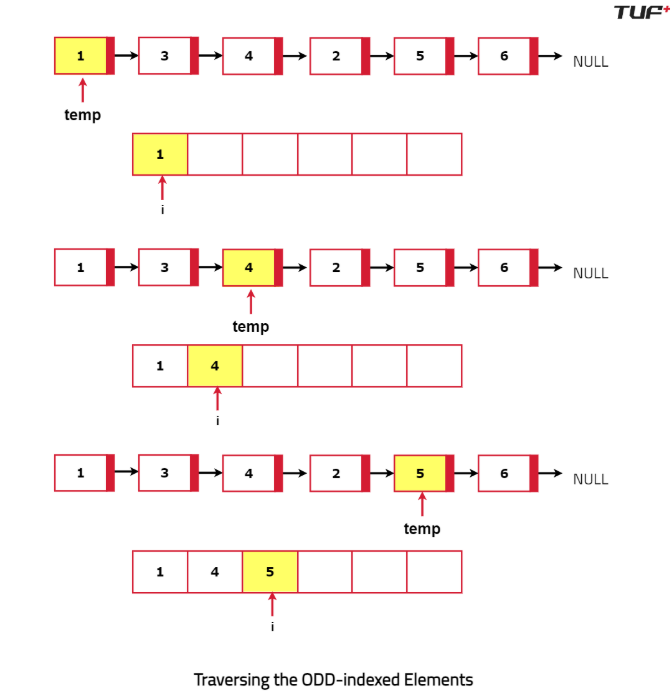
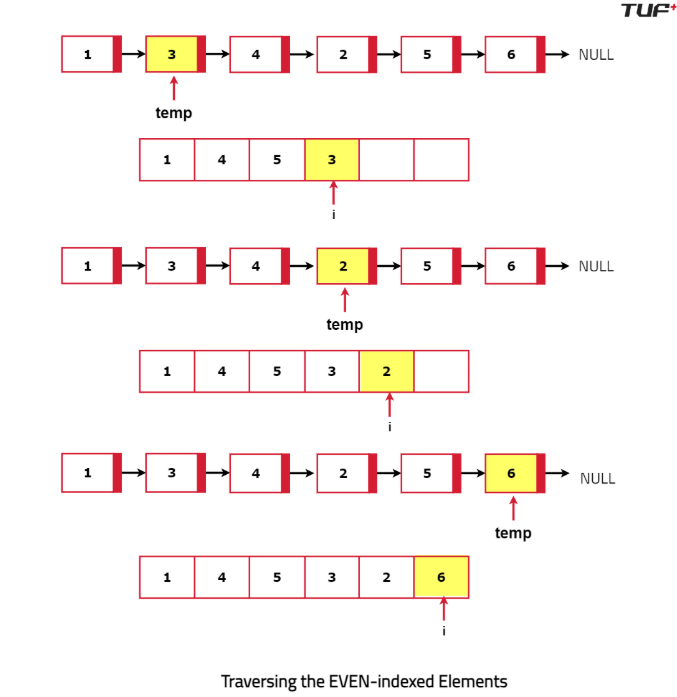

## Brute Force Python Solution

In [5]:
# Definition of Singly Linked List
class ListNode:
    def __init__(self, x=0, next=None):
        self.data = x
        self.next = next

class Solution:
    # Function to segregate odd and even indices nodes
    def oddEvenList(self, head):
        # Check if list is empty or has only one node
        if not head or not head.next:
            return head

        # To store values
        array = []
        temp = head

        '''Traverse the list, skipping one node, 
        and store values in the vector'''
        while temp and temp.next:
            array.append(temp.data)
            temp = temp.next.next

        '''If the traversal ends on a valid 
        odd-indexed node, include its value as well'''
        if temp:
            array.append(temp.data)

        # Reset temp 
        temp = head.next

        '''Traverse the list again, skipping one node ,
         and store values in the vector'''
        while temp and temp.next:
            array.append(temp.data)
            temp = temp.next.next

        '''If the traversal ends on a valid 
        even-indexed node, include its value as well'''
        if temp:
            array.append(temp.data)

        # Reset temp 
        temp = head
        i = 0

        # Update node values 
        while temp:
            temp.data = array[i]
            temp = temp.next
            i += 1

        return head

In [6]:
# Function to print the linked list
def printLL(head):
    while head:
        print(head.data, end=" ")
        head = head.next
    print()

# Main function
if __name__ == "__main__":
    # Create a linked list with given values
    arr = [1, 3, 4, 2, 5, 6]
    head = ListNode(arr[0])
    head.next = ListNode(arr[1])
    head.next.next = ListNode(arr[2])
    head.next.next.next = ListNode(arr[3])
    head.next.next.next.next = ListNode(arr[4])
    head.next.next.next.next.next = ListNode(arr[5])

    # Rearrange the list and print it
    solution = Solution()
    head = solution.oddEvenList(head)
    printLL(head)

1 4 5 3 2 6 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2*N) for the following reasons:-

Traversing the odd-indexed elements takes O(N/2) time.
Traversing the even-indexed elements takes O(N/2) time.

Updating the Linked List with the values from the array takes O(N) time. Here N is the size of the Linked List.
```

**Space Complexity:**
```
The Space Complexity will be O(N) because an additional list is used to store the grouped elements from the Linked List.
```

# Optimal Solution

### Intuition

The Brute Force approach utilizes additional space. To make it more effective, we can create links between all the odd-indexed and even-indexed elements while traversing the Linked List and finally point the last odd-indexed element to the first even-indexed element to get the desired Linked List without the help of an additional data structure.

### Approach

* Start by setting two pointers: one for the odd-indexed elements and one for the even-indexed elements. <b> The odd pointer will start at the first node, and the even pointer will start at the second node. Also, keep track of the first even-indexed node. </b>
* Traverse the Linked List, linking all the odd-indexed nodes together and all the even-indexed nodes together.
* Depending on whether the list length is odd or even, ensure the traversal continues appropriately. For an even-length list, make sure the loop runs until the node after the even pointer is not NULL. For an odd-length list, make sure the loop runs until the even pointer itself is not NULL.
* Once all nodes are grouped, link the last odd-indexed node to the first even-indexed node to form the desired Linked List without using extra space.

## Dry Run

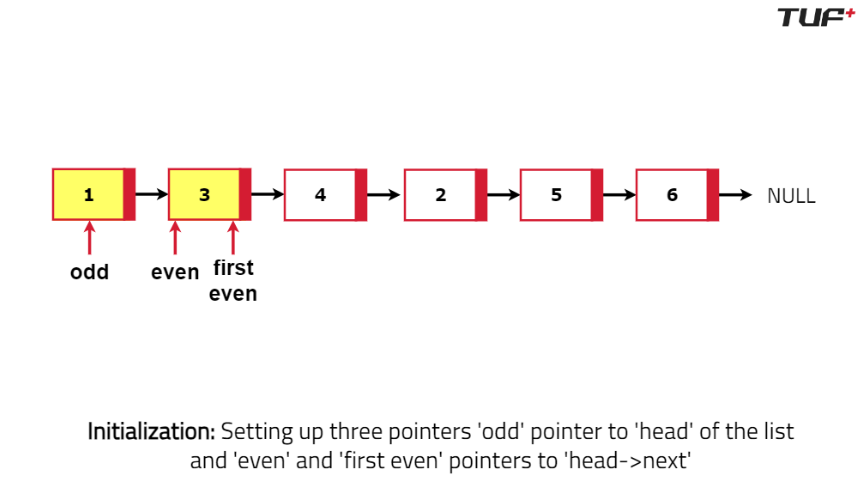
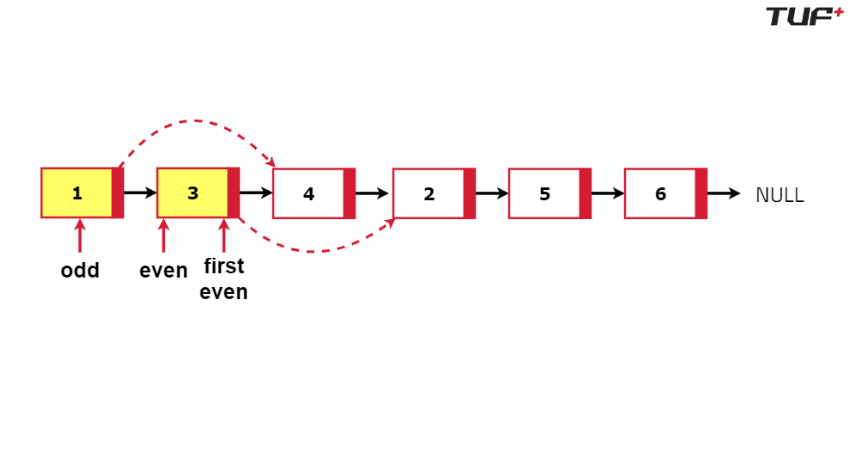
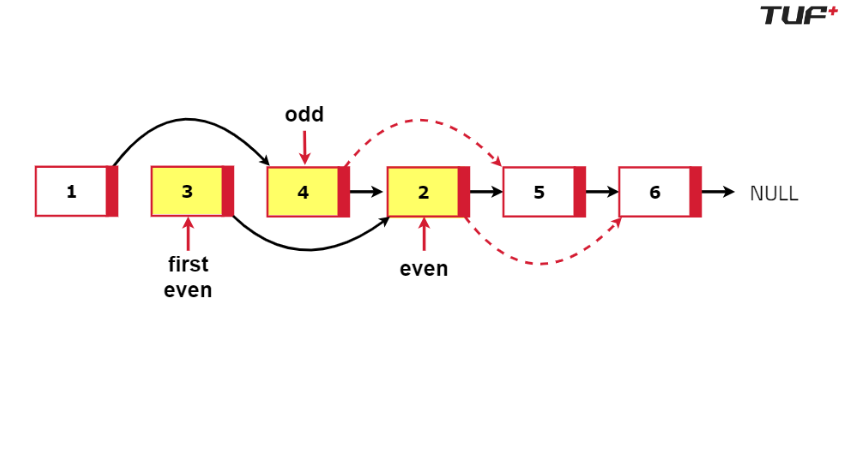
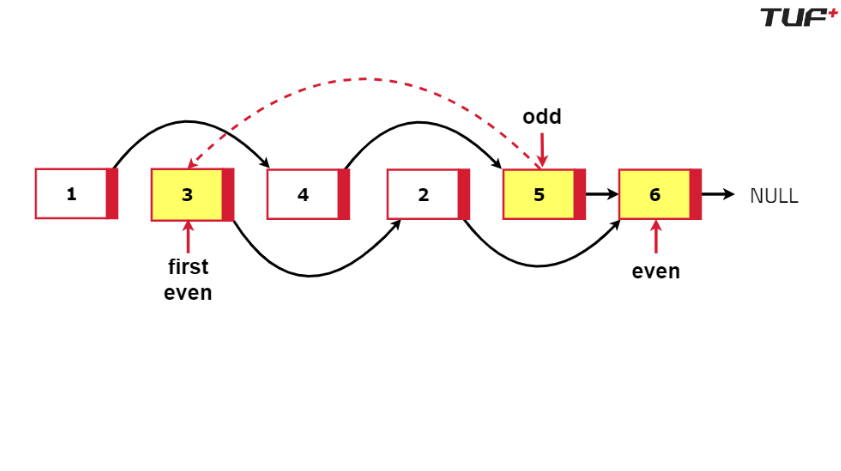
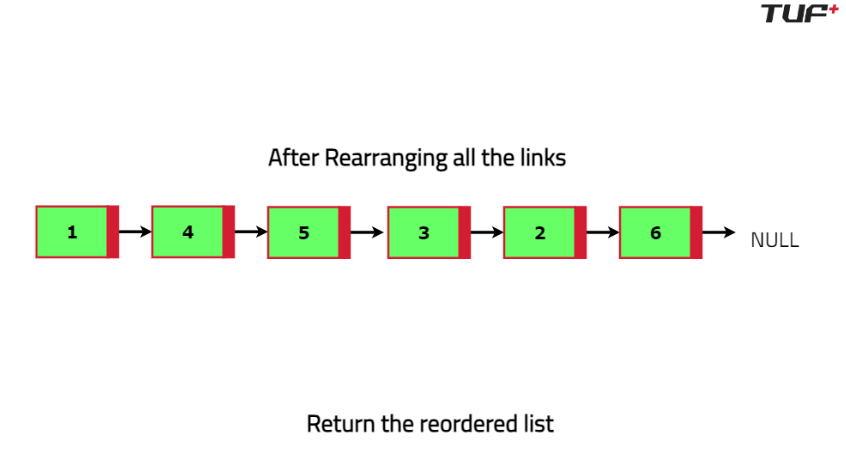

## Optimal Python Solution

In [7]:
# Definition of singly linked list
class ListNode:
    def __init__(self, x=0, next=None):
        self.data = x
        self.next = next

class Solution:
    # Function to rearrange nodes
    def oddEvenList(self, head):
        if not head or not head.next:
            return head

        '''Initialize pointers for odd 
        and even nodes and keep 
        track of the first even node'''
        odd = head
        even = head.next
        firstEven = head.next

        # Rearranging nodes
        while even and even.next:
            odd.next = odd.next.next
            even.next = even.next.next
            odd = odd.next
            even = even.next

        ''' Connect the last odd 
       node to the first even node'''
        odd.next = firstEven

        return head

In [8]:
# Function to print the linked list
def printLL(head):
    while head:
        print(head.data, end=" ")
        head = head.next
    print()

# Main function
if __name__ == "__main__":
    # Create a linked list with given values
    arr = [1, 3, 4, 2, 5, 6]
    head = ListNode(arr[0])
    head.next = ListNode(arr[1])
    head.next.next = ListNode(arr[2])
    head.next.next.next = ListNode(arr[3])
    head.next.next.next.next = ListNode(arr[4])
    head.next.next.next.next.next = ListNode(arr[5])

    # Rearrange the list and print it
    solution = Solution()
    head = solution.oddEvenList(head)
    printLL(head)

1 4 5 3 2 6 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N/2)*2 ~ O(N) because we are iterating over the odd-indexed as well as the even-indexed elements. Here N is the size of the given Linked List.
```

**Space Complexity:**
```
The Space Complexity will be O(1) because we have not used any extra space.
```

## FAQs & Interview Follow-ups :

**Why do we need 2 separate lists for odd and even nodes?**
```
This preserves the original order inside each group.
```

**How does this relate to real-world applications?**
```
Parallel Computing: Scheduling tasks at alternate intervals. Data Processing: Separating odd/even indexed elements efficiently.
```

**How would this change if we grouped even indices first instead of odd?**
```
Simply swap the starting points, i.e., even_head first.
```

**Can we modify this to work for k-grouping instead of just odd/even?**
```
Yes! Use k pointers and merge at the end.
```

# 3. Remove Nth Node from the Back of the Linked List :

## Problem Statement :

Given the head of a Singly Linked List and an integer n. Remove the nth node from the back of the Linked List and return the head of the modified list. <b> The value of n will always be less than or equal to the Number of nodes in the Linked List.</b>


### Examples :

**Example 1:**
```
Input: head -> 1 -> 2 -> 3 -> 4 -> 5, n = 2
Output: head -> 1 -> 2 -> 3 -> 5

Explanation: The 2nd node from the back was the node with value 4.
```

**Example 2:**
```
Input: head -> 5 -> 4 -> 3 -> 2 -> 1, n = 5
Output: head -> 4 -> 3 -> 2 -> 1

Explanation: The 5th node from the back is the first node of the Linked List.
```

```
Constraints:
1 <= Number of Nodes in the Linked List <= 10^5
0 <= ListNode.val <= 10^4
1 <= n <= Number of Nodes in the Linked List.
```

# Brute Force Solution

### Intuition

To delete the nth node from the end of a Linked List, <b>we first need to understand the formula (L-N+1)</b>, where L is the total length of the linked list. This formula helps us find the position of the node to delete from the start of the list:

* L is the total number of nodes in the list. N is the position of the node from the end.
* L - N gives the position of the node from the start in a 0-based index. Adding 1 converts it to a 1-based index, resulting in (L-N+1).

**Using this formula, break the problem into two main steps:**

* Calculating the Length of the Linked List.
* Deleting the (L-N+1)th Node from the Start.

**Edge Cases to Consider:**

* If N equals 1: We need to delete the tail node.
* If N equals the length of the linked list: We need to delete the head node.

### Approach

<b> Initialize and Traverse:</b> Set a temp pointer to the head of the list and create a counter cnt initialized to 0. Traverse the list, incrementing cnt at each node to find the total length L.

<b> Determine Position to Delete: </b> Calculate the position of the node to delete as (L-N+1) from the start.

<b> Traverse to Target Node: </b> Reinitialize temp to the head and initialize a variable res to (L-N). Traverse the list, decrementing res at each node until it reaches 0, positioning temp at the (L-N)th node.

<b> Delete the Node: </b> Adjust the pointers to skip the (L-N+1)th node by linking the (L-N)th node to the (L-N+2)th node. Free the memory of the (L-N+1)th node.

Note: In the case of languages like Java, Python, and JavaScript, there is no need for the deletion of objects or nodes because these have an automatic garbage collection mechanism that automatically identifies and reclaims memory that is no longer in use.

## Dry Run

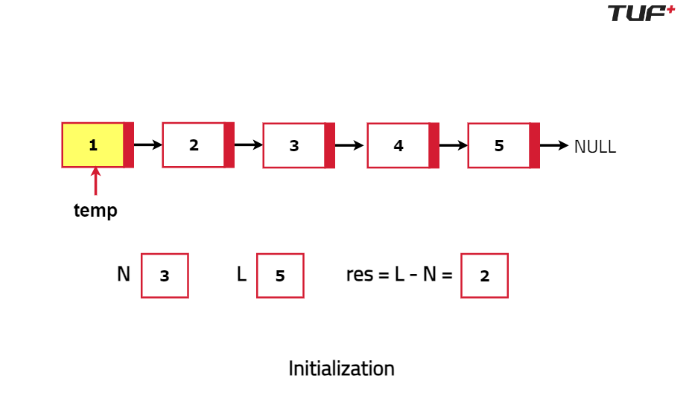
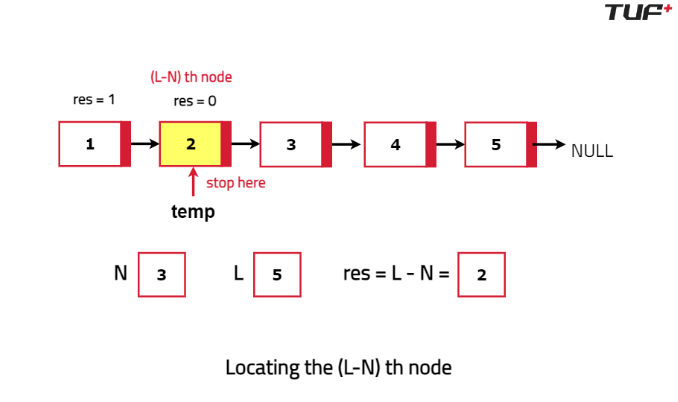
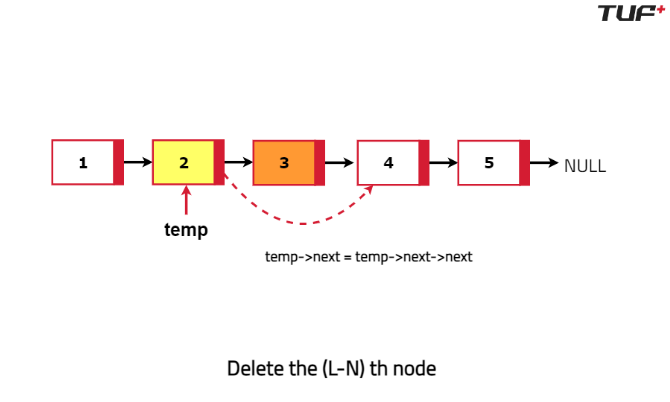
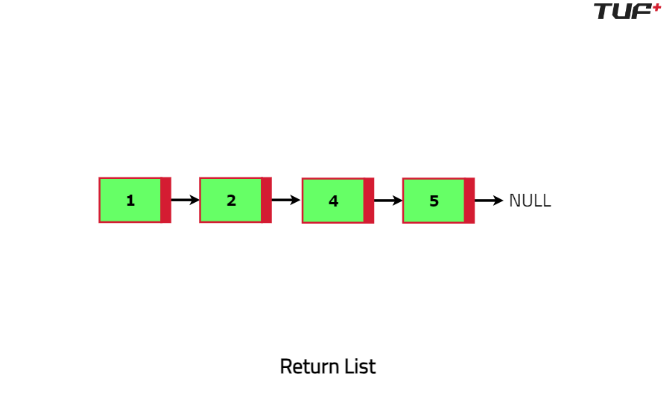

## Brute Force Python Solution

In [9]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    # Function to remove the nth node from end
    def removeNthFromEnd(self, head: ListNode, n: int) -> ListNode:
        if not head:
            return None
        cnt = 0
        temp = head

        # Count the number of nodes
        while temp:
            cnt += 1
            temp = temp.next

        # If N equals the total number of nodes, delete the head
        if cnt == n:
            return head.next

        # Calculate the position of the node to delete (res)
        res = cnt - n
        temp = head

        # Traverse to the node just before the one to delete
        while res > 1:
            res -= 1
            temp = temp.next

        # Delete the Nth node from the end
        temp.next = temp.next.next
        return head

In [10]:
# Function to print the linked list
def printLL(head: ListNode):
    while head:
        print(head.val, end=" ")
        head = head.next
    print()

if __name__ == "__main__":
    arr = [1, 2, 3, 4, 5]
    N = 3
    head = ListNode(arr[0])
    head.next = ListNode(arr[1])
    head.next.next = ListNode(arr[2])
    head.next.next.next = ListNode(arr[3])
    head.next.next.next.next = ListNode(arr[4])

    # Solution instance
    solution = Solution()
    head = solution.removeNthFromEnd(head, N)
    printLL(head)

1 2 4 5 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(L) + O(L-N). We are calculating the Length of the Linked List and then iterating up to the (L-N)th node of the Linked List, where L is the Total Length of the List and N is the position of the node to delete.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

# Optimal Solution

### Intuition

The Brute Force Method for removing the nth node from the end of a Linked List has a Time Complexity of O(2*L) in the worst case, where L is the length of the linked list. This is because the list is traversed twice: once to calculate the length and once to find and remove the node. Therefore, it is not the most efficient algorithm.

To enhance efficiency, we use a two-pointer technique involving a fast pointer and a slow pointer. <b> The fast pointer is initially positioned exactly N nodes ahead of the slow pointer. Then, both pointers move one step at a time. When the fast pointer reaches the last node (the L-th node), the slow pointer will be at the (L-N)-th node. </b> This allows us to remove the nth node from the end in a single traversal, improving the time complexity to O(L).

### Approach

<b> Initialize Pointers: Start by setting 2 pointers, slow and fast, at the head of the Linked List. Move the fast pointer N nodes ahead of the slow pointer.

<b> Simultaneous Traversal: </b> Traverse the Linked List with both pointers moving one step at a time. Continue this until the fast pointer reaches the end of the list (the Lth node). At this point, the slow pointer will be at the (L-N)th node.

<b> Adjust Pointers: </b> Update the slow pointer to skip the next node by pointing it to the (L-N+2)th node. This effectively removes the Nth node from the end of the list.

<b> Delete the Node: </b> Free the memory occupied by the node that was skipped to complete the deletion process.

Note: Freeing up memory space explicitly is not available in some languages like Java and JavaScript. These languages rely on garbage collection to automatically manage memory. In these languages, the garbage collector will eventually remove the skipped node once there are no references to it. However, in languages like C++ and C, it's essential to free the memory to prevent memory leaks explicitly.

## Dry Run

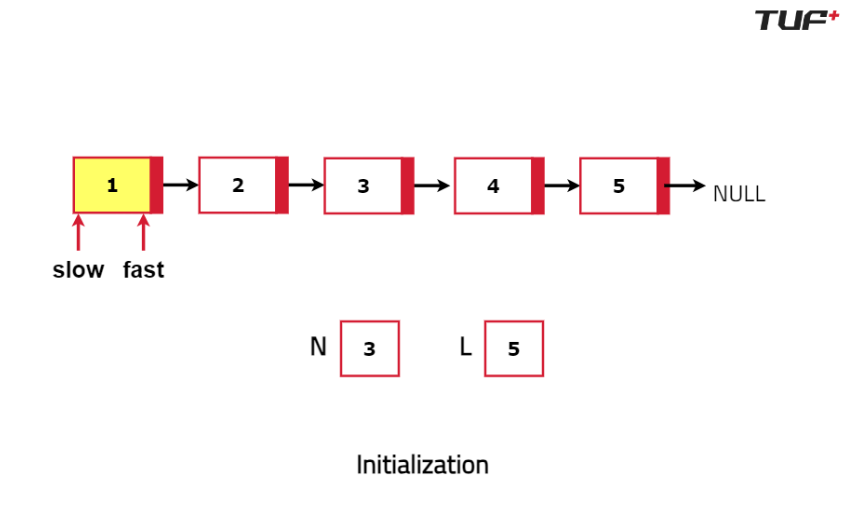
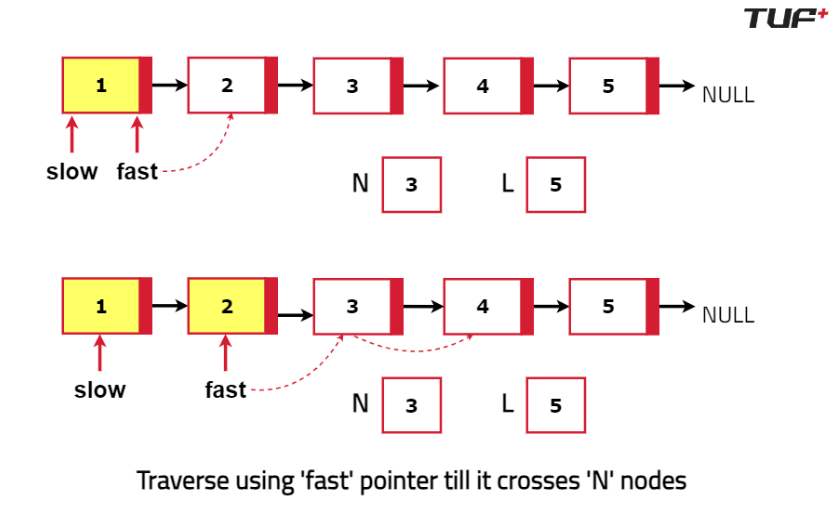
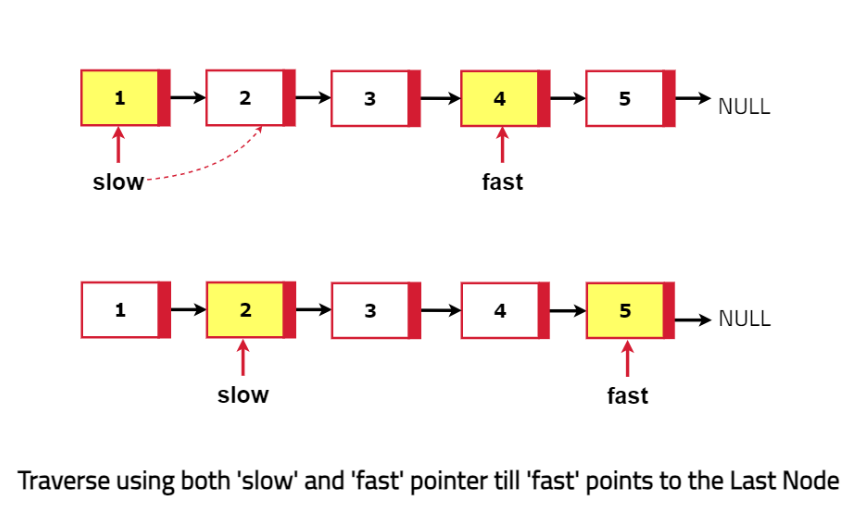
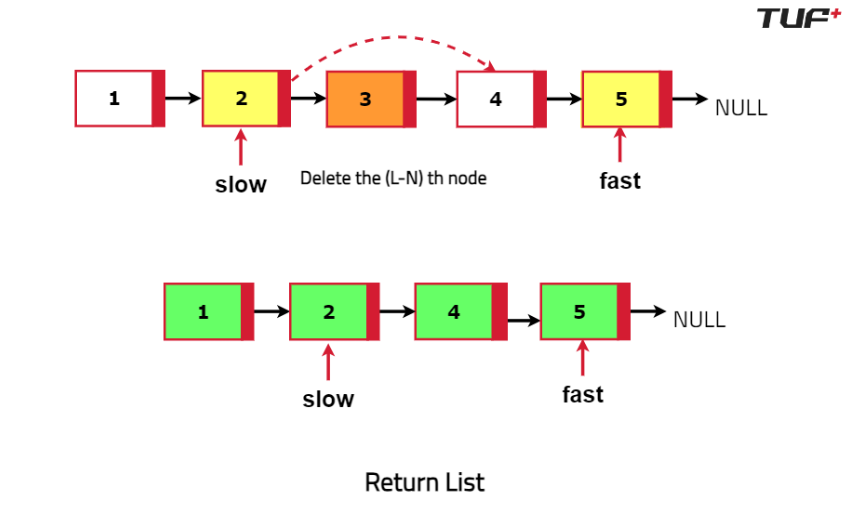

## Optimal Python Solution

In [11]:
# Definition of Singly Linked List
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    # Function to remove the nth node from end
    def removeNthFromEnd(self, head: ListNode, n: int) -> ListNode:
        # Creating pointers
        fastp = head
        slowp = head

        # Move the fastp pointer N nodes ahead
        for _ in range(n):
            fastp = fastp.next

        # If fastp becomes NULL the Nth node from the end is the head
        if not fastp:
            return head.next

        # Move both pointers Until fastp reaches the end
        while fastp.next:
            fastp = fastp.next
            slowp = slowp.next

        # Delete the Nth node from the end
        slowp.next = slowp.next.next
        return head

In [12]:
# Function to print the linked list
def printLL(head: ListNode):
    while head:
        print(head.val, end=" ")
        head = head.next
    print()

if __name__ == "__main__":
    arr = [1, 2, 3, 4, 5]
    N = 3
    # Creation of linked list
    head = ListNode(arr[0])
    head.next = ListNode(arr[1])
    head.next.next = ListNode(arr[2])
    head.next.next.next = ListNode(arr[3])
    head.next.next.next.next = ListNode(arr[4])

    # Solution instance
    solution = Solution()
    head = solution.removeNthFromEnd(head, N)
    printLL(head)

1 2 4 5 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N) since the fast pointer will traverse the entire Linked List, where N is the Length of the Linked List.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

## FAQs & Interview Follow-ups :

**Why do we use a dummy node?**
```
To handle edge cases where the first node needs to be removed (n = Length of List). Without a dummy node, removing the first node requires a separate condition.
```

**Why do we move fast pointer n steps ahead first?**
```
This ensures that when fast reaches the end, slow will be exactly before the node to remove.
```

**How would this approach change if the Linked List were Doubly Linked?**
```
The algorithm remains the same, but pointer updates would also need to update prev pointers.
```

**Can this be extended to remove multiple nth nodes from different lists efficiently?**
```
Yes, using Batch Processing where the fast pointer moves in parallel for multiple lists.
```

# 4. Delete the Middle Node of the Linked List :

## Problem Statement :

Given the head of a non-empty Singly Linked List containing integers, delete the middle node of the Linked List. Return the head of the modified linked list.

<b> The Middle Node of a Linked List of size n is the (⌊n / 2⌋ + 1)th node from the start using 1-based indexing, where ⌊x⌋ denotes the largest integer less than or equal to x.</b>


### Examples :

**Example 1:**
```
Input: head -> 1 -> 2 -> 3 -> 4 -> 5
Output: head -> 1 -> 2 -> 4 -> 5

Explanation: n = 5.
⌊n / 2⌋ + 1 = 3, and therefore the Middle Node has index 3 and so the node with value 3 was deleted.
```

**Example 2:**
```
Input: head -> 7 -> 6 -> 5 -> 4
Output: head -> 7 -> 6 -> 4

Expl﻿anation: n = 4.
⌊n / 2⌋ + 1 = 3. Therefore the middle node has an index of 3 and hence the node with value 5 was deleted.
```

```
Constraints:
1 <= Number of Nodes in the Linked List <= 10^5
0 <= ListNode.val <= 10^4
```

# Brute Force Solution

### Intuition

First, count all the nodes by going through the list. Then, start again from the beginning and go to the node just before the middle one. Change the links to skip over the middle node, taking it out of the list.

### Approach

* First, count all the nodes in the Linked List to find out how many nodes there are. Then, figure out which node is in the middle by dividing the total number of nodes by 2.
* Next, start from the beginning of the list and move through the nodes until you reach the middle one.
* When you reach the middle node, remove it by linking the previous node directly to the node after the middle one. Finally, clear the space that was taken up by the middle node.

## Dry Run

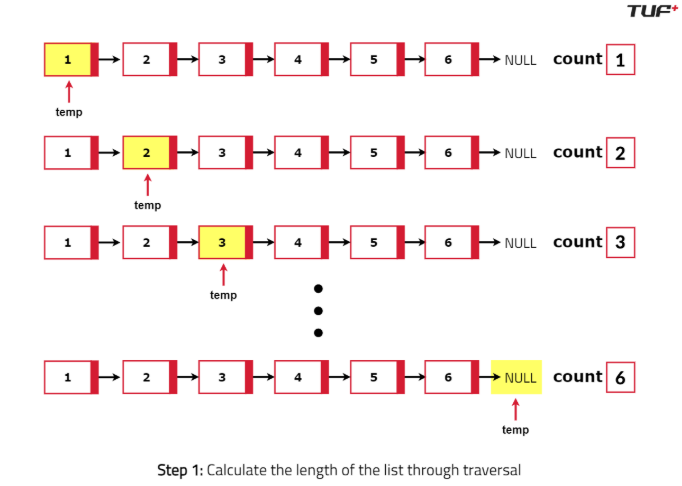
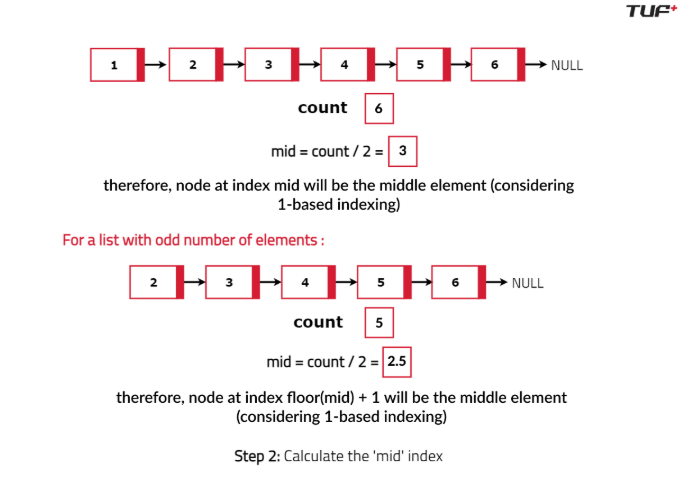
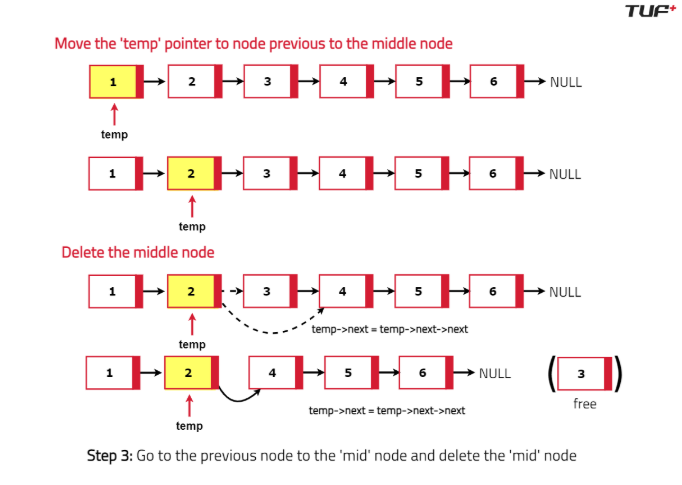

## Brute Force Python Solution

In [13]:
# Definition of singly linked list:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    # Function to delete middle node of linked list
    def deleteMiddle(self, head):
        """ Edge case: if the list is empty 
        or has only one node, return null """
        if not head or not head.next:
            return None

        # Temporary node to traverse
        temp = head
        
        # Variable to store number of nodes
        n = 0
        
        """ Loop to count the number of nodes 
        in the linked list """
        while temp:
            n += 1
            temp = temp.next
        
        # Index of the middle node
        middleIndex = n // 2
        
        # Reset temporary node 
        # to beginning of linked list
        temp = head
        
        """ Loop to find the node 
        just before the middle node """
        for _ in range(1, middleIndex):
            temp = temp.next
        
        # If the middle node is found
        if temp.next:
            # Create pointer to the middle node
            middle = temp.next
            
            # Adjust pointers to skip middle node
            temp.next = temp.next.next
            
            """ Free the memory allocated 
            to the middle node """
            del middle
        
        # Return the head of the modified linked list
        return head

In [14]:
# Function to print the linked list
def printLL(head):
    temp = head
    while temp:
        print(temp.val, end=" ")
        temp = temp.next
    print()

# Creating a sample linked list: 
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

# Display the original linked list
print("Original Linked List: ", end="")
printLL(head)

# Deleting the middle node
solution = Solution()
head = solution.deleteMiddle(head)

# Displaying the updated linked list
print("Updated Linked List: ", end="")
printLL(head)

Original Linked List: 1 2 3 4 5 
Updated Linked List: 1 2 4 5 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N + N/2) because the loop traverses the entire Linked List once to count the Total Number of Nodes. After that the loop iterates halfway through the Linked List to reach the Middle Node. Hence, the time complexity is O(N + N/2) ~ O(N).
```

**Space Complexity:**
```
The Space Complexity will be O(1) because the code uses a constant amount of extra space regardless of the size of the Linked List. It doesn't use any additional data structures in proportion to the input size.
```

# Optimal Solution

### Intuition

The Brute Force Method involves traversing the Linked List twice to find and delete the middle node. To make this more efficient,we use the Tortoise and Hare approach which helps in finding the middle node in one traversal by moving the 'slow' pointer one step and the 'fast' pointer two steps at a time.

This ensures the 'slow' pointer reaches the middle when the 'fast' pointer reaches the end. To have 'slow' reach just before the middle, the 'fast' pointer gets a head start.

### Approach

<b>Initialization:</b> Check if the list is empty or has only one node. If so, there is no middle node to delete, and hence return NULL. Set 'slow' and 'fast' pointers at the head of the list, and move 'fast' 2 nodes ahead initially.

<b>Traverse the List:</b> Move the 'slow' pointer 1 step at a time and the 'fast' pointer 2 steps at a time. Continue this process until the 'fast' pointer reaches the end of the list.

<b>Middle Node Detection:</b> When the 'fast' pointer reaches the end of the list, the 'slow' pointer will be at the node just before the middle node.

<b>Delete Middle Node:</b> Remove the middle node by adjusting the 'next' pointer of the 'slow' node to skip over the middle node.

<b>Return Modified List:</b> Return the head of the modified linked list.

## Dry Run

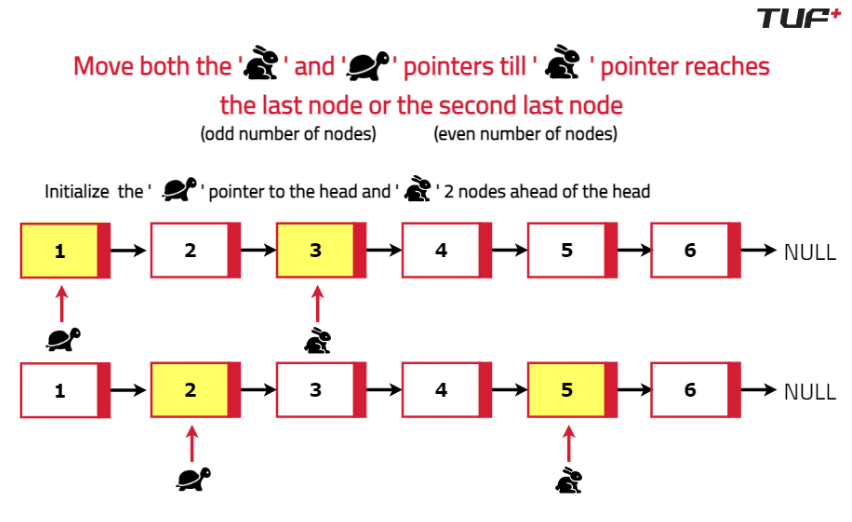
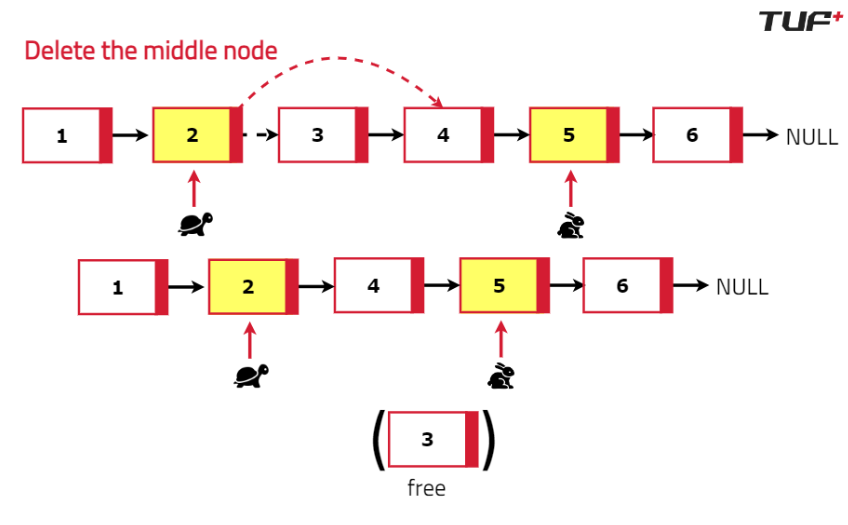

## Optimal Python Solution

In [15]:
# Definition of Singly Linked List:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    # Function to delete the middle node of a linked list
    def deleteMiddle(self, head):
        """ If the list is empty or has only one node,
        return None as there is no middle node to delete """
        if not head or not head.next:
            return None

        # Initialize slow and fast pointers
        slow = head
        fast = head.next.next

        # Move 'fast' pointer twice as fast as 'slow'
        while fast and fast.next:
            slow = slow.next
            fast = fast.next.next

        # Delete the middle node by skipping it
        slow.next = slow.next.next
        return head

In [16]:
# Function to print the linked list
def printLL(head):
    temp = head
    while temp:
        print(temp.val, end=" ")
        temp = temp.next
    print()

# Creating a sample linked list: 
head = ListNode(1)
head.next = ListNode(2)
head.next.next = ListNode(3)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(5)

# Display the original linked list
print("Original Linked List: ", end="")
printLL(head)

# Deleting the middle node
solution = Solution()
head = solution.deleteMiddle(head)

# Displaying the updated linked list
print("Updated Linked List: ", end="")
printLL(head)

Original Linked List: 1 2 3 4 5 
Updated Linked List: 1 2 4 5 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N/2) because the code traverses the Linked List using the Tortoise and Hare approach. The code increments both 'slow' and 'fast' pointers at different rates, effectively covering about half the list before reaching the midpoint, and hence the Time Complexity of the algorithm is O(N/2) ~ O(N).
```

**Space Complexity:**
```
The Space Complexity will be O(1) because the code uses a constant amount of extra space regardless of the size of the input (Linked List). It doesn't use any additional data structures in proportion to the input size.
```

## FAQs & Interview Follow-ups :

**Why does the 2-pointer approach work?**
```
Since fast moves twice as fast as slow, slow will reach the middle when fast reaches the end.
```

**Why do we need the prev pointer?**
```
prev tracks the node before slow, allowing us to delete slow efficiently.
```

**Can this be modified to delete the k-th node instead of the middle node?**
```
Yes! Use the same approach, but move slow k-1 steps.
```

**How does this approach change for a Doubly Linked List?**
```
The logic remains the same, but deletion is easier using prev.
```

# 5. Sort a Linked List :

## Problem Statement :

Given the head of a Singly Linked List. Sort the values of the Linked List in non-decreasing order and return the head of the modified linked list.

### Examples :

**Example 1:**
```
Input: head -> 5 -> 6 -> 1 -> 2 -> 1
Output: head -> 1 -> 1 -> 2 -> 5 -> 6

Explanation: 1 <= 1 <= 2 <= 5 <= 6
```

**Example 2:**
```
Input: head -> 6 -> 5 -> -1 -> -2 -> -3
Output: head -> -3 -> -2 -> -1 -> 5 -> 6

Explanation: -3 <= -2 <= -1 <= 5 <= 6
```

```
Constraints:
0 <= number of nodes in the linked list <= 1000
-10^4 <= ListNode.val <= 10^4
```

# Brute Force Solution

### Intuition

A straightforward approach to Sorting a Linked List involves converting the Linked List into an array. Once converted, the array can be sorted using any standard sorting algorithm. After sorting, a new Linked List can be created using the sorted values from the array.

### Approach

* Create an empty array to store the node values.
* Traverse the Linked List using a temporary pointer starting at the head, pushing each node's value into the array, and moving the pointer to the next node.
* Sort the array containing the node values in ascending order.
* Convert the Sorted Array back into a Linked List by reassigning the values from the sorted array to the nodes, overwriting the values sequentially according to the order in the array.

## Dry Run

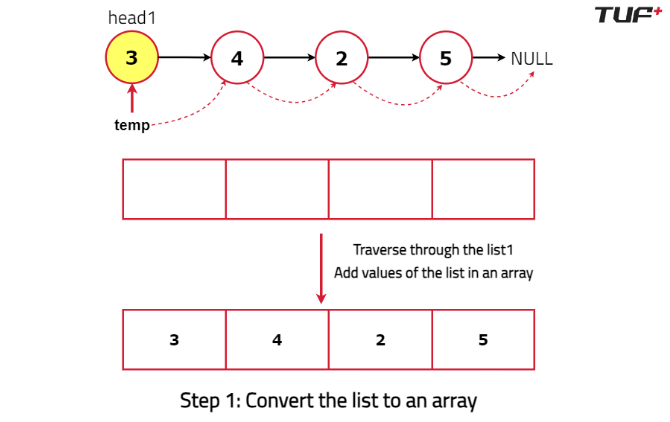
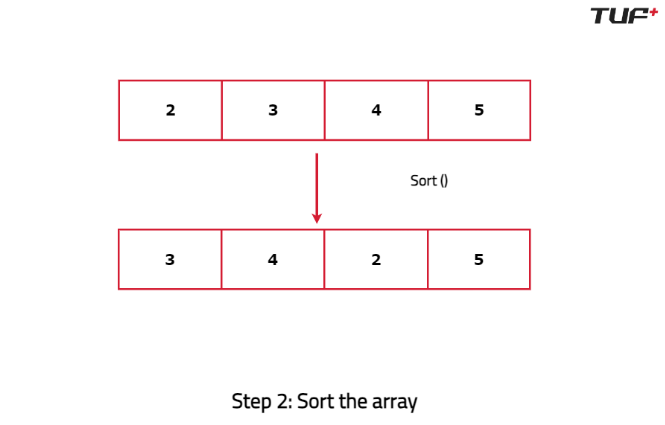
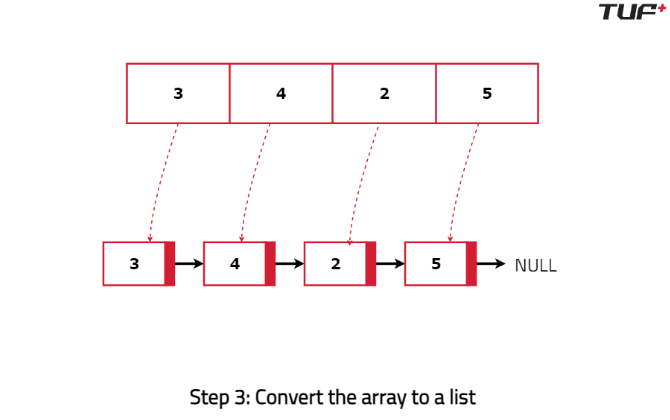

## Brute Force Python Solution

In [17]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    # Function to sort Linked List
    def sortList(self, head):
        # List to store node values
        arr = []

        # Temporary pointer to traverse
        # the linked list
        temp = head

        # Traverse the linked list
        while temp:
            arr.append(temp.val)
            temp = temp.next

        # Sort list containing node values
        arr.sort()

        # Reassign sorted values to
        # linked list nodes
        temp = head
        for val in arr:
            # Update the node's data
            temp.val = val
            # Move to the next node
            temp = temp.next

        # Return the head
        return head

In [18]:
# Function to print the linked list
def printLinkedList(head):
    temp = head
    while temp:
        # Print the data of the current node
        print(temp.val, end=" ")
        # Move to the next node
        temp = temp.next
    print()

# Linked List: 3 2 5 4 1
head = ListNode(3)
head.next = ListNode(2)
head.next.next = ListNode(5)
head.next.next.next = ListNode(4)
head.next.next.next.next = ListNode(1)

print("Original Linked List: ", end="")
printLinkedList(head)

solution = Solution()
# Sort the linked list
head = solution.sortList(head)

print("Sorted Linked List: ", end="")
printLinkedList(head)

Original Linked List: 3 2 5 4 1 
Sorted Linked List: 1 2 3 4 5 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N) + O(N log N) + O(N) for the following reasons:-

O(N): Time taken to traverse the Linked List and store its data values in an array.
O(N log N): Time taken to sort the array of node values.
O(N): Time taken to traverse the sorted array and reassign values back to the Linked List.

Here N represents the Number of Nodes in the Linked List.
```

**Space Complexity:**
```
The Space Complexity will be O(N) because we need to store values of Nodes of the Linked Lists in the array of size N where N is the Length of the Linked List.
```

# Optimal Solution

### Intuition

<b>Instead of using an external array to store node values, we can utilize an in-place sorting algorithm such as Merge Sort or Quick Sort, which can be adapted for linked lists.</b> This approach avoids using additional space.

Merge Sort employs the divide and conquer strategy:-

Divides the Linked List into smaller parts until they become trivial to sort (single node or empty list).
Merges and sorts the divided parts while combining them back together.

### Approach

<b>Base Case:</b> If the Linked List contains zero or one element, it is already sorted. Return the head node.

<b>Split the List:</b> Find the Middle of the Linked List using a slow and a fast pointer. Split the Linked List into 2 halves at the Middle Node. The 2 halves will be left and right.

<b>Recursion:</b> Recursively apply Merge Sort to both halves obtained in the previous step. This step continues dividing the Linked List until there's only one node in each half.

<b>Merge Sorted Lists:</b> Merge the sorted halves obtained from the recursive calls into a single sorted linked list. Compare the nodes from both halves and rearrange them to form a single sorted list. Update the head pointer to the beginning of the newly sorted list.

<b>Return:</b> Once the merging is complete, return the head of the sorted linked list.

## Dry Run

**Breaking down the List and then Sorting the smaller parts :**

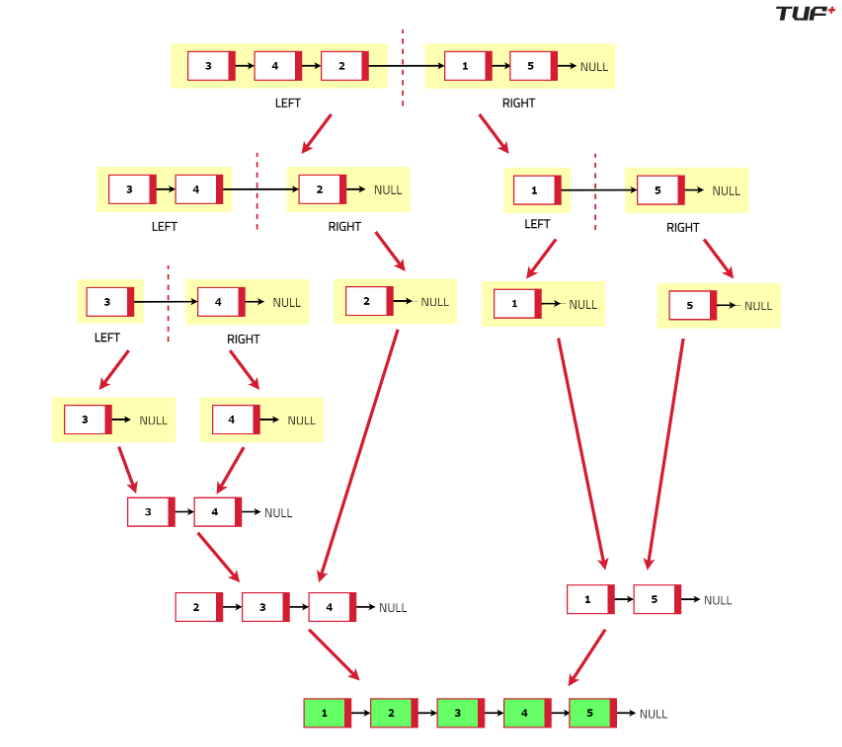

## Optimal Python Solution

In [28]:
class ListNode:
    def _init_(self, val=0, next=None):
        self.val = val
        self.next = next

class Solution:
    # Function to merge two sorted linked lists
    def mergeTwoSortedLinkedLists(self, list1, list2):
        # Create dummy node to serve as head of merged list
        dummyNode = ListNode(-1)
        temp = dummyNode

        # Traverse both lists simultaneously
        while list1 is not None and list2 is not None:
            # Compare elements of both lists and link the smaller node to the merged list
            if list1.val <= list2.val:
                temp.next = list1
                list1 = list1.next
            else:
                temp.next = list2
                list2 = list2.next
            # Move the temporary pointer to the next node
            temp = temp.next

        # If any list still has remaining elements, append them to the merged list
        if list1 is not None:
            temp.next = list1
        else:
            temp.next = list2

        # Return the merged list starting from the next of the dummy node
        return dummyNode.next

    # Function to find the middle of a linked list
    def findMiddle(self, head):
        # If the list is empty or has only one node, the middle is the head itself
        if head is None or head.next is None:
            return head

        # Initializing slow and fast pointers
        slow = head
        fast = head.next

        # Move the fast pointer twice as fast as the slow pointer
        # When the fast pointer reaches the end, the slow pointer will be at the middle
        while fast is not None and fast.next is not None:
            slow = slow.next
            fast = fast.next.next

        return slow

    # Function to perform merge sort on a linked list
    def sortList(self, head):
        # Base case: if the list is empty or has only one node, it is already sorted, so return the head
        if head is None or head.next is None:
            return head
        
        # Find middle of list using findMiddle function
        middle = self.findMiddle(head)
        
        # Divide the list into two halves
        right = middle.next
        middle.next = None
        left = head
        
        # Recursively sort left and right halves
        left = self.sortList(left)
        right = self.sortList(right)
        
        # Merge the sorted halves using the mergeTwoSortedLinkedLists function
        return self.mergeTwoSortedLinkedLists(left, right)

In [30]:
# Function to print the linked list
def printLinkedList(head):
    temp = head
    while temp is not None:
        # Print the data of the current node
        print(temp.val, end=" ") 
        # Move to the next node
        temp = temp.next
    print()

if __name__ == "_main_":
    # Linked List: 3 2 5 4 1
    head = ListNode(3)
    head.next = ListNode(2)
    head.next.next = ListNode(5)
    head.next.next.next = ListNode(4)
    head.next.next.next.next = ListNode(1)

    print("Original Linked List: ", end="")
    printLinkedList(head)

    solution = Solution()
    # Sort the linked list
    head = solution.sortList(head)

    print("Sorted Linked List: ", end="")
    printLinkedList(head)

## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N*logN) where N is the Number of nodes in the Linked List. Finding the middle node of the linked list requires traversing it linearly taking O(N) time complexity and to reach the individual nodes of the list, it has to be split log N times (continuously halve the list until we have individual elements).
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional data structures or space is allocated for storage during the merging process. However, space proportional to O(log N) stack space is required for the recursive calls. The maximum recursion depth of log N height is occupied on the call stack.
```

## FAQs & Interview Follow-ups :

**Why do we need to check for cycles before merging?**
```
If a cycle exists, the merging process enters an infinite loop, preventing termination.
```

**Can we remove cycles after merging instead?**
```
No, because merging assumes that lists are finite. If cycles exist, merging would never terminate.
```

**What if a cycle exists in the final merged list instead of the child lists?**
```
The same Floyd’s Cycle Detection Algorithm can be applied after merging to check for cycles.
```

**Can we optimize cycle detection further?**
```
Yes, by maintaining visited node references (O(n) space), but Floyd’s Algorithm is preferred for O(1) space.
```

# 6. Sort a Linked List of 0's, 1's and 2's by Changing Links :

## Problem Statement :

Given the head of a Singly Linked List consisting of only 0's, 1's and 2's.

<b>Sort the given Linked List and return the head of the modified list. Do it in-place by changing the links between the nodes without creating new nodes.</b>

### Examples :

**Example 1:**
```
Input: linkedList = [1, 0, 2, 0 , 1]
Output: [0, 0, 1, 1, 2]

Explanation: The values after sorting are [0, 0, 1, 1, 2].
```

**Example 2:**
```
Input: linkedList = [1, 1, 1, 0]
Output: [0, 1, 1, 1]

Explanation: The values after sorting are [0, 1, 1, 1].
```

```
Constraints:
0 <= Number of Nodes in the Linked List <= 10^5
0 <= ListNode.val <= 2
```

# Brute Force Solution

## Intuition

Since there are only 3 distinct values in the Linked List, it's straightforward to count the occurrences of 0s, 1s, and 2s. After counting, we can overwrite the Linked List nodes based on these frequencies.

## Approach

* Take 3 variables to maintain the count of 0, 1, and 2.
* Traverse the Linked List to count the occurrences of each value.
* In the second traversal of the linked list, overwrite the first 'a' nodes with '0', the next 'b' nodes with '1', and the remaining 'c' nodes with '2' based on the counts.

## Dry Run

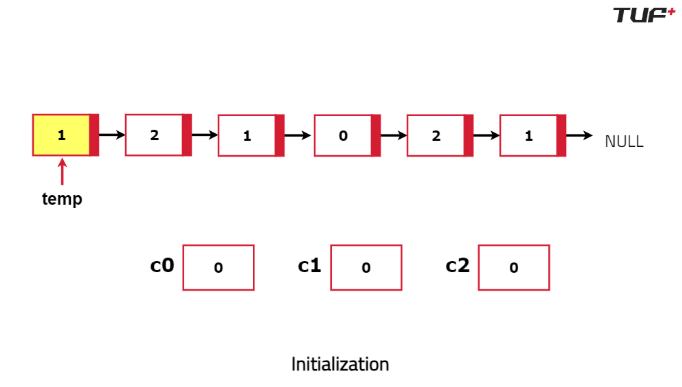
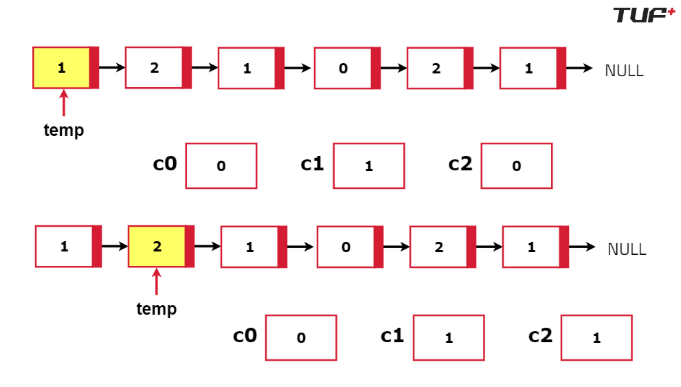
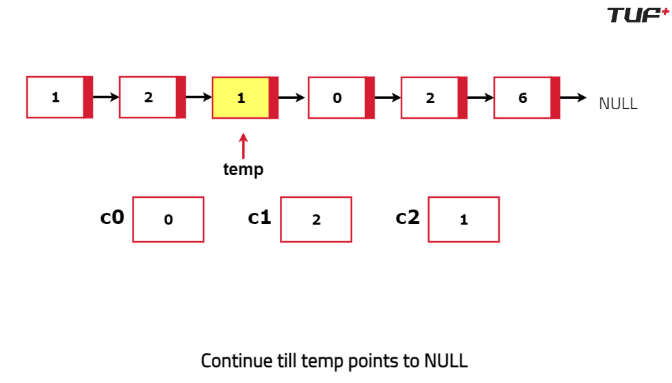
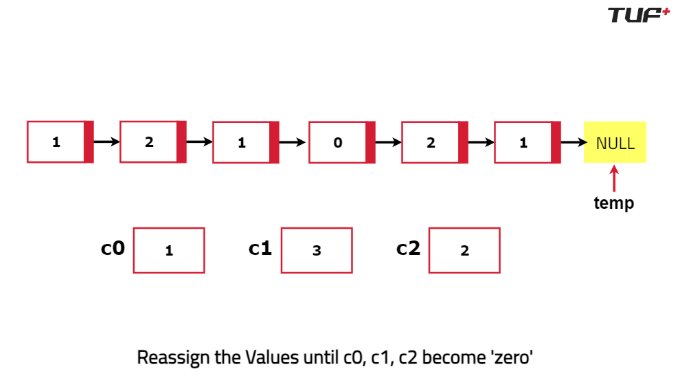
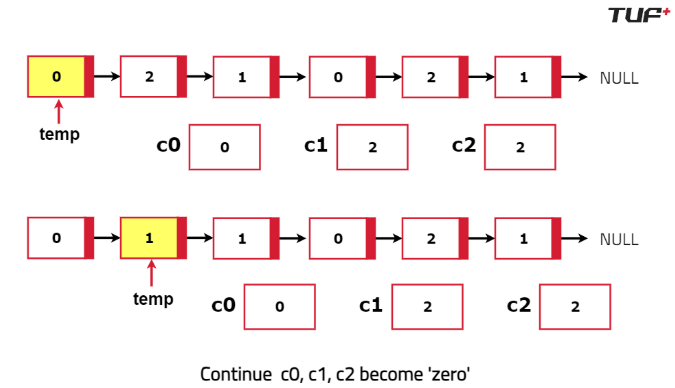
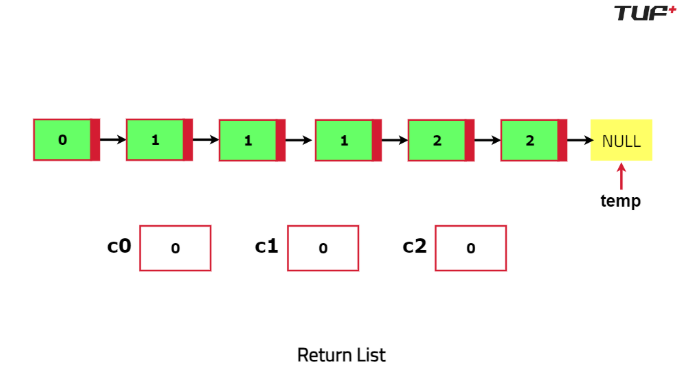

## Brute Force Python Solution

In [31]:
# Definition of Singly Linked List:
class ListNode:
    def __init__(self, x=0, next=None):
        self.data = x
        self.next = next

class Solution:
    # Function to sort the linked list
    def sortList(self, head):
        # Initialize counts
        c0 = 0
        c1 = 0
        c2 = 0
        temp = head

        # Count the number of 0s,
        # 1s, and 2s
        while temp is not None:
            if temp.data == 0:
                c0 += 1
            elif temp.data == 1:
                c1 += 1
            elif temp.data == 2:
                c2 += 1
            temp = temp.next

        temp = head

        # Reassign values to the
        # nodes based on the counts
        while temp is not None:
            if c0 > 0:
                temp.data = 0
                c0 -= 1
            elif c1 > 0:
                temp.data = 1
                c1 -= 1
            elif c2 > 0:
                temp.data = 2
                c2 -= 1
            temp = temp.next

        return head

# Function to print linked list
def printList(head):
    while head is not None:
        print(head.data, end=" ")
        head = head.next
    print()

In [32]:
# Function to create new node
def newNode(data):
    return ListNode(data)

if __name__ == "__main__":
    # Creating a linked list
    head = newNode(1)
    head.next = newNode(2)
    head.next.next = newNode(0)
    head.next.next.next = newNode(1)
    head.next.next.next.next = newNode(2)
    head.next.next.next.next.next = newNode(0)
    head.next.next.next.next.next.next = newNode(1)

    # Print original list
    print("Original list: ", end="")
    printList(head)

    # Sort the list
    sol = Solution()
    head = sol.sortList(head)

    # Print sorted list
    print("Sorted list: ", end="")
    printList(head)

Original list: 1 2 0 1 2 0 1 
Sorted list: 0 0 1 1 1 2 2 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(2*N) because the code traverses the Linked List twice: once while counting the frequency of 0's, 1's, and 2's, and once again while reassigning the values to the nodes. Here, N represents the Length of the Linked List or the Number of Nodes present in the Linked List.
```

**Space Complexity:**
```
The Space Complexity will be O(1) as no additional space is used.
```

# Optimal Solution

## Intuition

Traverse the Linked List to segregate nodes into 3 separate lists based on their values (0s, 1s, and 2s). Finally, link these lists together to form a Single Sorted Linked List.

## Approach

* Create 3 dummy nodes to serve as the heads of three separate lists for 0s, 1s, and 2s. Also, create pointers to track the current end of each of these lists.
* Traverse the original Linked List. For each node, append it to the appropriate list (0s, 1s, or 2s) based on its value and update the corresponding pointer.
* Connect the 3 lists together. Link the end of the 0s list to the start of the 1s list (or directly to the 2s list if the 1s list is empty). Then, link the end of the 1s list to the start of the 2s list.
* The new head of the Sorted Linked List will be the node following the dummy node for 0s.
* Return the new head of the Sorted Linked List. This completes the process and results in a Sorted Linked List.

## Dry Run

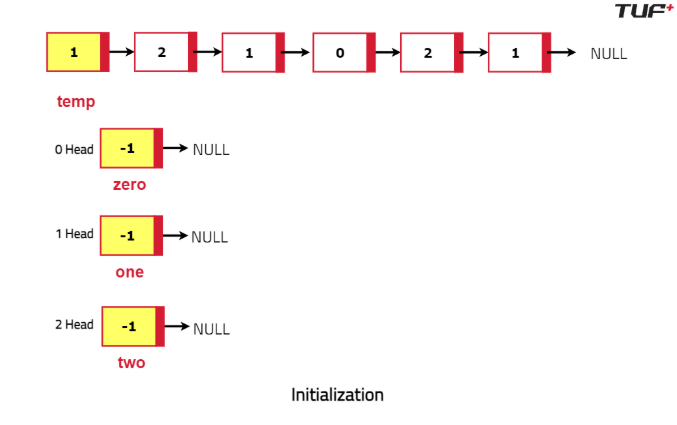
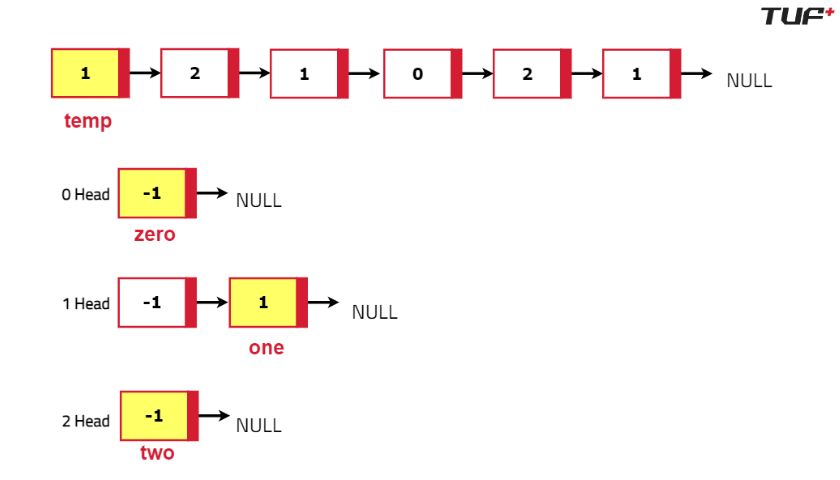
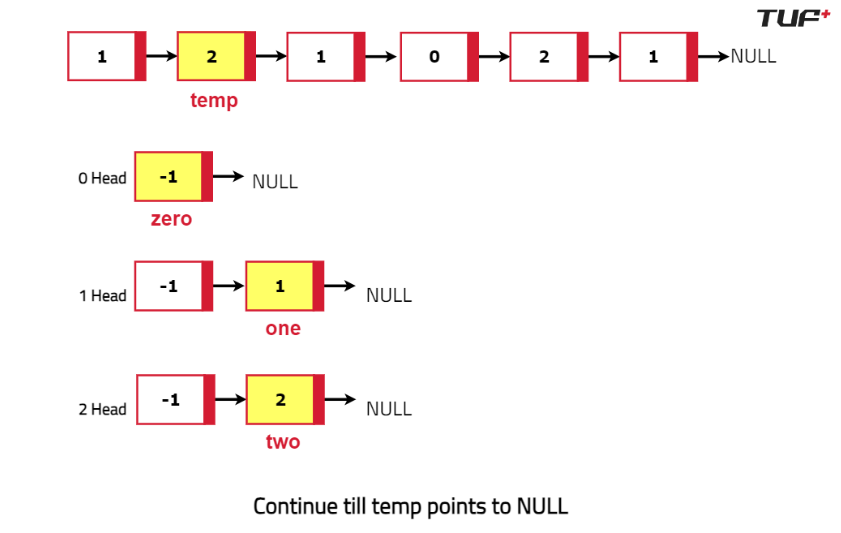
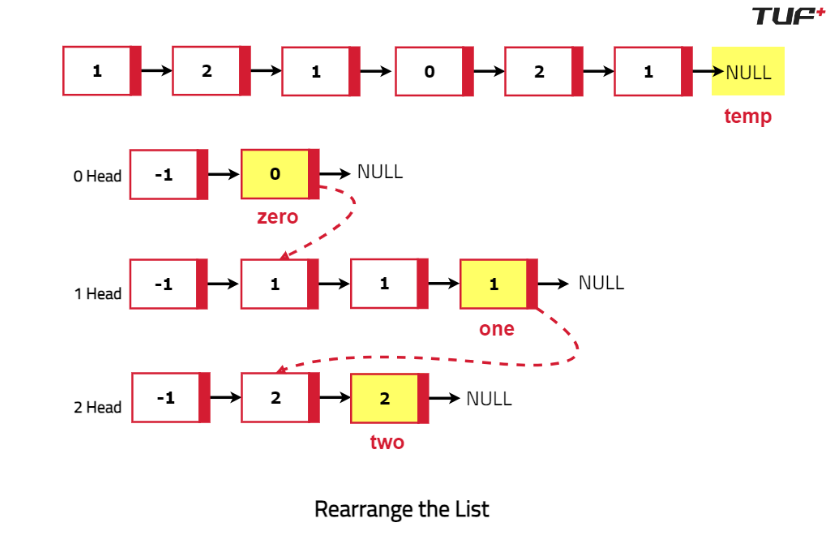
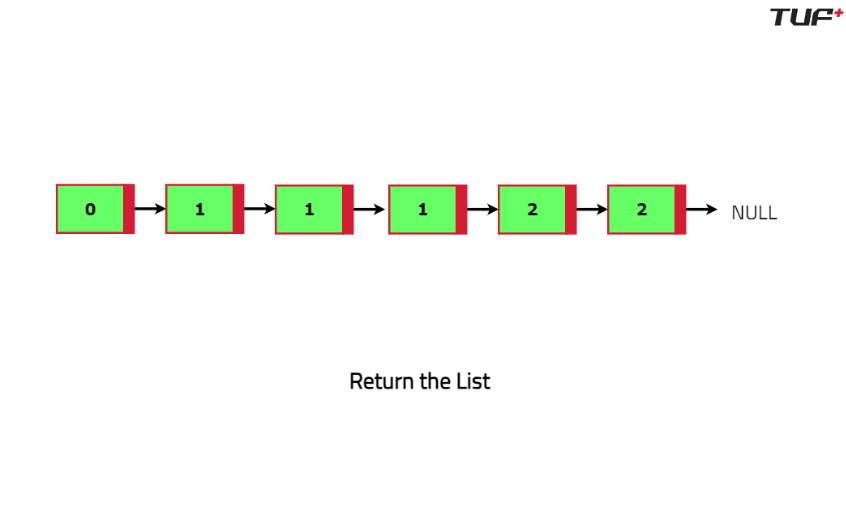

## Optimal Python Solution

In [33]:
# Definition of Singly Linked List:
class ListNode:
    def __init__(self, x=0, next=None):
        self.data = x
        self.next = next

class Solution:
    # Function to sort the linked list
    def sortList(self, head):
        '''If the list is empty or has only one 
           node, return as it is already sorted'''
        if head is None or head.next is None:
            return head

        # Dummy nodes to point to heads of 
        # three lists
        zeroHead = ListNode(-1)
        oneHead = ListNode(-1)
        twoHead = ListNode(-1)

        # Pointers to current last nodes of 
        # three lists
        zero = zeroHead
        one = oneHead
        two = twoHead
        temp = head

        '''Traverse the original list 
           and distribute the nodes 
           into three lists'''
        while temp is not None:
            if temp.data == 0:
                zero.next = temp
                zero = temp
            elif temp.data == 1:
                one.next = temp
                one = temp
            elif temp.data == 2:
                two.next = temp
                two = temp
            temp = temp.next

        # Connect the three lists together
        zero.next = oneHead.next if oneHead.next else twoHead.next
        one.next = twoHead.next
        two.next = None

        # New head of the sorted list
        newHead = zeroHead.next

        # Return the new head
        return newHead

In [34]:
# Function to print linked list
def printList(head):
    while head is not None:
        print(head.data, end=" ")
        head = head.next
    print()

# Function to create new node
def newNode(data):
    return ListNode(data)

if __name__ == "__main__":
    # Creating a linked list
    head = newNode(1)
    head.next = newNode(2)
    head.next.next = newNode(0)
    head.next.next.next = newNode(1)
    head.next.next.next.next = newNode(2)
    head.next.next.next.next.next = newNode(0)
    head.next.next.next.next.next.next = newNode(1)

    # Print original list
    print("Original list: ", end="")
    printList(head)

    # Sort the list
    sol = Solution()
    head = sol.sortList(head)

    # Print sorted list
    print("Sorted list: ", end="")
    printList(head)

Original list: 1 2 0 1 2 0 1 
Sorted list: 0 0 1 1 1 2 2 


## Complexity Analysis

**Time Complexity:**
```
The Time Complexity will be O(N) because the code traverses the Linked List once. Here, N represents the Length of the Linked List or the Number of Nodes present in the Linked List.
```

**Space Complexity:**
```
The Space Complexity will be O(1) because no extra space is used and we just change the links of the nodes.
```

## FAQs & Interview Follow-ups :

**Why do we need 3 separate dummy lists instead of modifying the original list?**
```
Modifying links directly while traversing can lead to broken links or require multiple scans. Using 3 separate lists ensures stable sorting without losing track of nodes.
```

**What happens if the input list already has sorted 0s, 1s, and 2s?**
```
The algorithm processes the list normally, but no rearrangement is needed since pointers remain unchanged.
```

**How can this be extended to handle a Linked List with arbitrary numbers instead of just 0, 1, and 2?**
```
Use Bucket Sort logic but with Hash Maps to store frequency counts. Instead of 3 pointers, use multiple dummy lists for each unique value.
```

**Can this be modified to sort Linked Lists containing values from 0 to k?**
```
Yes, generalize it by: Creating k+1 linked lists. Distributing nodes into respective buckets. This merges all buckets into a single list.
```

# 7. Find the Intersection Point of Y Linked Lists :

## Problem Statement :

Given the heads of 2 Linked Lists A and B, containing positive integers. Find the node at which the 2 linked lists intersect. If they do intersect, return the node at which the intersection begins, otherwise return null.

<b> The Linked List will not contain any cycles.</b> The linked lists must retain their original structure, given as per the input, after the function returns.

Note: For custom input, the following parameters are required (your program is not provided with these parameters):

intersectVal - The value of the node where the intersection occurs. This is -1 if there is no intersected node.
skipA - The Number of Nodes to skip ahead in listA (starting from the head) to get to the intersected node (-1 if no intersection).
skipB - The Number of Nodes to skip ahead in listB (starting from the head) to get to the intersected node (-1 if no intersection).
listA - The First Linked List.
listB - The Second Linked List.


### Examples :

**Example 1:**
```
Input: listA: intersectVal = 4, skipA = 3, skipB = 2,
listA: head -> 1 -> 2 -> 3 -> 4 -> 5,
listB: head -> 7 -> 8 -> 4 -> 5

Output(value at returned node is displayed): 4

Explanation: The two lists have nodes with values 4 and 5 as their tails.
```

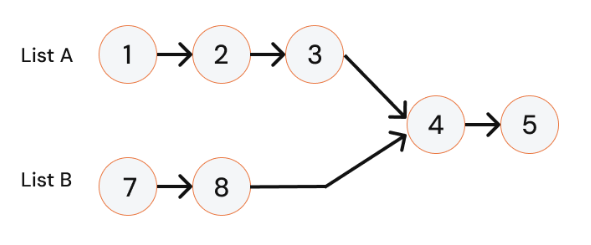

**Example 2:**
```
Input: listA: intersectVal = -1, skipA = -1, skipB = -1,
listA: head -> 1 -> 2 -> 3,
listB: head -> 8 -> 9

Output(value at returned node is displayed): null

Explanation: The two lists do not intersect.
```

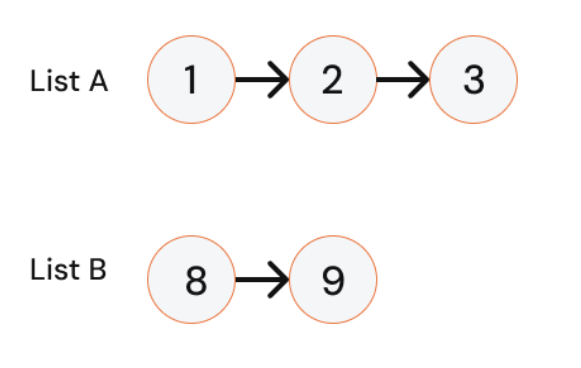

```
Constraints:
m == number of nodes in listA.
n == number of nodes in listB.
1 <= m, n <= 5 * 10^4
0 <= ListNode.val <= 10^4
0 <= skipA < m
0 <= skipB < n
intersectVal, skipA, skipB is -1 if listA and listB do not intersect.
intersectVal == listA[skipA] == listB[skipB] if listA and listB intersect.
```

# Brute Force Solution

## FAQs & Interview Follow-ups :

**Why does switching pointers ensure they meet at the intersection?**
```
By switching at the end, both pointers traverse the same total distance. This guarantees that they meet at the intersection node if one exists.
```

**Can this approach be used if the lists have cycles?**
```
No, since we assume that the lists do not contain cycles. For cycles, Floyd’s Cycle Detection (Tortoise and Hare Algorithm) is required.
```

**What if we could modify the lists?**
```
We could append one list to the other, making intersection detection simpler.
```

**How can this be extended to detect multiple intersections?**
```
The problem assumes one intersection, but multiple intersections require extra tracking.
```